In [1]:
import os
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import pi, arccos, cos, sin, tan, mean
import ROOT

Welcome to JupyROOT 6.24/06


In [2]:
supersim = os.environ["CDMS_SUPERSIM"]
# Pull in Warren's detector-channel drawing utility from SuperSim
sys.path.append(os.path.join(supersim,"CDMSscripts","validation"))
import detectorLayout

In [3]:
detname = {11: 'iZIP5',
           21: 'CDMSlite1',
           22: 'CDMSlite2',
           700: 'iZIP7',
           701: 'iZIP7Si',
           710: 'HV100mm',
           711: 'HV100mmSi'}
N_TES = 49
N_trueTES = {11: 455, 
             21: 455,
             22: 455,
             700: 1590,
             701: 1590,
             710: 1833,
             711: 1833}

In [4]:
dmcfile = 'CDMSlite_10keV.root'
Geometry = ROOT.RDataFrame("G4SettingsInfoDir/Geometry", dmcfile).AsNumpy()
chaninfo = detectorLayout.loadGeometry(dmcfile)

Extracting geometry data...


In [5]:
dettype = Geometry["DetType"][0]      # Need [0] to select row from Geometry TTree
detname = detname[dettype]
side = 'top'
maskfile = os.path.join(supersim,"CDMSgeometry","data","dmc",detname,side+"_mask.dat")

In [6]:
mask = pd.read_csv(maskfile,names=['x','y','phirot'],header=None,delim_whitespace=True)
mask['pseudoTES'] = mask.index % N_TES

In [7]:
cmap = plt.get_cmap('jet')
ptcolor = [cmap(i) for i in np.linspace(0, 1, N_TES+1)]
mask['QETcolor'] = [ptcolor[x] for x in mask['pseudoTES']]

Generating detector diagram...


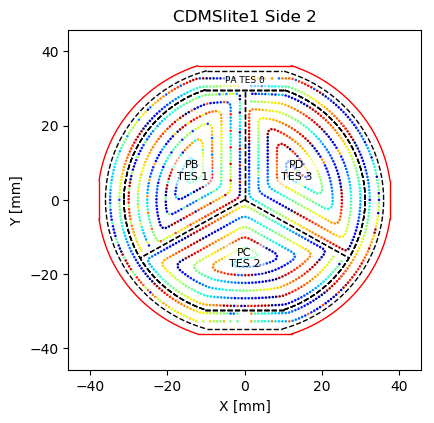

In [23]:
detectorLayout.draw(chaninfo)
plt.scatter(mask['x'],mask['y'],c=mask['QETcolor'],s=0.7)

Generating detector diagram...


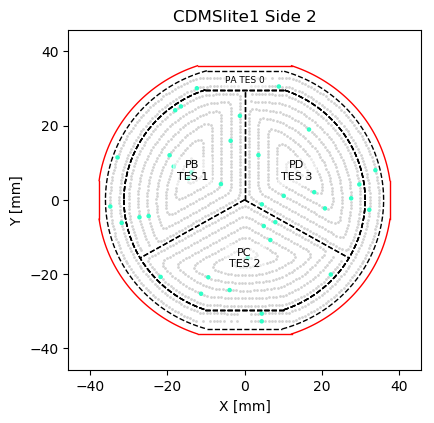

In [21]:
detectorLayout.draw(chaninfo)
onePseudo = mask[mask["pseudoTES"]==20]
plt.scatter(mask['x'],mask['y'],c='lightgrey',s=1)
plt.scatter(onePseudo['x'],onePseudo['y'],c=onePseudo['QETcolor'],s=5)